                                                           CIFAR-10                                                                                                                                              

Image Classification Using Convolutional Neural Network (CNN)

1)The CIFAR-10 Dataset consists of 60000 Images of 32x32 color images in 10 classes           
2)50000 training images and 10000 test images                                                
3)classes = airplane,automobile, bird, cat, deer, dog, frog, horse, ship, truck

Import required Libraries

In [3]:
import tensorflow as tf 
from tensorflow.keras import datasets , layers , models  #tensorflow.keras gives you access to layers and models.
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.metrics import confusion_matrix , classification_report

Load the CIFAR-10 Dataset

In [4]:
(X_train , y_train), (X_test , y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


check the number of the Training and testing images

In [ ]:
X_train.shape 


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Normalize the Image pixel values 0 to 1 ,usually the pixel values range from 0 to 255

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Convolutional Neural Network 

In [ ]:
cnn = models.Sequential()

# 1st Convolution + MaxPooling

cnn.add(layers.Conv2D(filters=32 , kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn.add(layers.MaxPooling2D((2,2))) #This adds a MaxPooling layer which reduces the image size (downsampling).

# 2nd Convolution + MaxPooling
cnn.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
cnn.add(layers.MaxPooling2D((2,2)))

# Flatten before fully connected layers
cnn.add(layers.Flatten())

# Fully connected dense layer with dropout
cnn.add(layers.Dense(64, activation='relu'))


# Output layer
cnn.add(layers.Dense(10, activation='softmax'))

 Compile and Train the CNN

In [24]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

history = cnn.fit(X_train, y_train , epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2646 - loss: 3.2365 - val_accuracy: 0.4861 - val_loss: 1.4307
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5069 - loss: 1.3615 - val_accuracy: 0.5457 - val_loss: 1.2654
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5743 - loss: 1.1904 - val_accuracy: 0.5851 - val_loss: 1.1623
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6158 - loss: 1.0794 - val_accuracy: 0.6047 - val_loss: 1.1362
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6526 - loss: 0.9959 - val_accuracy: 0.6327 - val_loss: 1.0841
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6809 - loss: 0.9183 - val_accuracy: 0.6396 - val_loss: 1.0611
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7036 - loss: 0.8593 - val_accuracy: 0.6503 - val_loss: 1.0509
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7197 - loss: 0

 Evaluate and Analyze Results

In [25]:
# Evaluate on test data
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6528 - loss: 1.0851
Test Accuracy: 0.6518999934196472


Visualize Training History

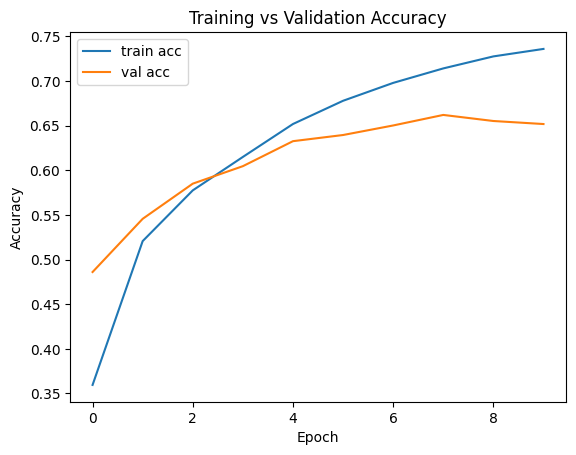

In [26]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()
